In [1178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression,RidgeClassifier,Lasso,ElasticNet
import sklearn.metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold,KFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc=StandardScaler()

In [1179]:
ypred = pd.DataFrame()

In [1180]:
test_t = pd.read_csv('loan_train.csv')
train_t = pd.read_csv('test_loan.csv')

In [1181]:
test_t['Loan_Status'] = np.nan

In [1182]:
df = pd.concat([train_t,test_t])
df.Loan_Status.replace(['Y','N'],[1,0],inplace=True)

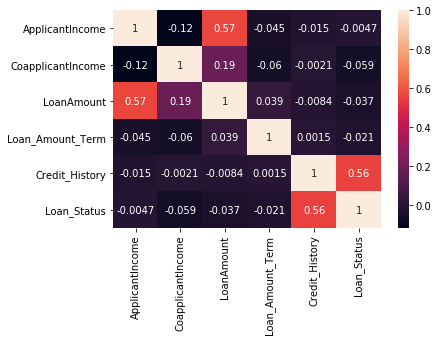

In [1183]:
sns.heatmap(df[~df['Loan_Status'].isna()].corr(),annot=True)

In [1184]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1.0


In [1185]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,981.000000,981.000000,954.000000,961.000000,902.000000,614.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920,0.687296
std,5695.104533,2718.772806,77.421743,65.100602,0.370553,0.463973
min,0.000000,0.000000,9.000000,6.000000,0.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [1186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
Loan_ID              981 non-null object
Gender               957 non-null object
Married              978 non-null object
Dependents           956 non-null object
Education            981 non-null object
Self_Employed        926 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Credit_History       902 non-null float64
Property_Area        981 non-null object
Loan_Status          614 non-null float64
dtypes: float64(5), int64(1), object(7)
memory usage: 107.3+ KB


In [1187]:
df.Gender.value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

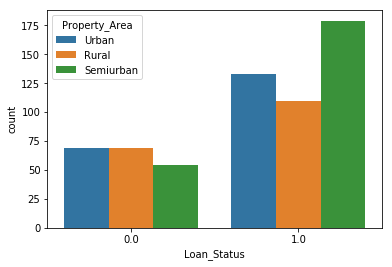

In [1188]:
sns.countplot(x='Loan_Status',data=df,hue='Property_Area')

In [1189]:
df.Gender = df.groupby(['Property_Area'])['Gender'].transform(lambda x: x.fillna(x.mode()[0]))

In [1190]:
df.Married.value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [1191]:
df.Married = df.groupby(['Gender','Education'])['Married'].transform(lambda x: x.fillna(x.mode()[0]))

In [1192]:
df.Married.value_counts()

Yes    633
No     348
Name: Married, dtype: int64

In [1193]:
df2=df.copy()
df.Dependents.value_counts()

0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64

In [1194]:
df=df2.copy()
df.Dependents.value_counts()

0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64

In [1195]:
df.Dependents = df.groupby(['Married','Gender','Education'])['Dependents'].transform(lambda x: x.fillna(x.mode()[0]))

In [1196]:
df.Dependents.value_counts()

0     570
2     160
1     160
3+     91
Name: Dependents, dtype: int64

In [1197]:
df3=df.copy()
df.Self_Employed.value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

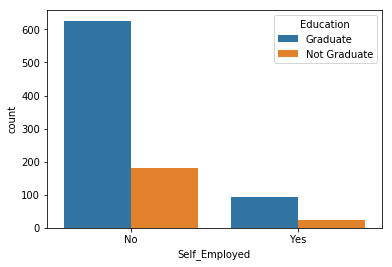

In [1198]:
sns.countplot('Self_Employed',data=df,hue='Education')

In [1199]:
df=df3.copy()
df.Self_Employed.value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [1200]:
df.Self_Employed= df.groupby(['Education','Married','Property_Area','Gender'])['Self_Employed'].transform(lambda x: x.fillna(x.mode()[0]))

In [1201]:
df.Self_Employed.value_counts()

No     862
Yes    119
Name: Self_Employed, dtype: int64

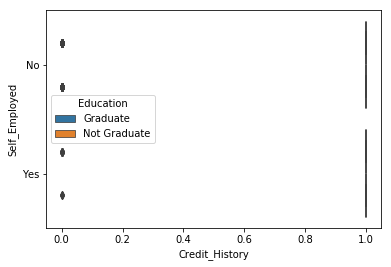

In [1202]:
sns.boxplot(x='Credit_History',y='Self_Employed',hue='Education',data=df,orient='V')

In [1203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
Loan_ID              981 non-null object
Gender               981 non-null object
Married              981 non-null object
Dependents           981 non-null object
Education            981 non-null object
Self_Employed        981 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Credit_History       902 non-null float64
Property_Area        981 non-null object
Loan_Status          614 non-null float64
dtypes: float64(5), int64(1), object(7)
memory usage: 127.3+ KB


In [1204]:
df.LoanAmount = df.groupby(['Education','Self_Employed','Gender','Married','Dependents','Property_Area'])['LoanAmount'].transform(lambda x: x.fillna(x.median()))

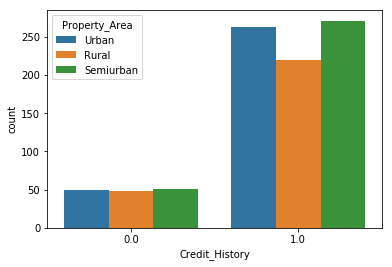

In [1205]:
sns.countplot(x='Credit_History',hue='Property_Area',data=df)

In [1206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
Loan_ID              981 non-null object
Gender               981 non-null object
Married              981 non-null object
Dependents           981 non-null object
Education            981 non-null object
Self_Employed        981 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           981 non-null float64
Loan_Amount_Term     961 non-null float64
Credit_History       902 non-null float64
Property_Area        981 non-null object
Loan_Status          614 non-null float64
dtypes: float64(5), int64(1), object(7)
memory usage: 127.3+ KB


In [1207]:
df1=df.copy()
df.Credit_History.value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [1208]:
df=df1.copy()
df.Credit_History.value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [1209]:

df.Credit_History = df.groupby(['Education','Self_Employed','Gender','Married','Dependents'])['Credit_History'].transform(lambda x: x.fillna(x.median()))

In [1210]:
df.Credit_History.value_counts()

1.0    829
0.0    149
0.5      3
Name: Credit_History, dtype: int64

In [1211]:
df.Loan_Amount_Term = df.groupby(['Education','Self_Employed','Gender','Married','Dependents','Property_Area'])['Loan_Amount_Term'].transform(lambda x: x.fillna(x.median()))

In [1212]:
#df['Income']=(df.ApplicantIncome+df.CoapplicantIncome-(df.LoanAmount/df.Loan_Amount_Term))
#df=df.drop(columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','EMI'])

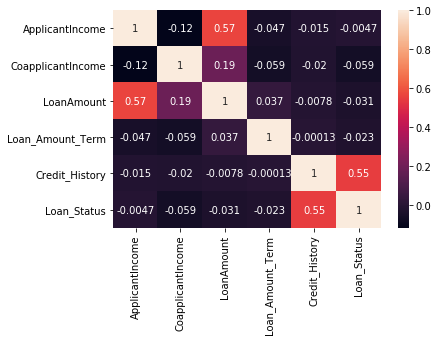

In [1213]:
sns.heatmap(df[~df['Loan_Status'].isna()].corr(),annot=True)

In [1214]:
dum =pd.get_dummies(df[['Education','Self_Employed','Married','Gender','Dependents','Property_Area']])

In [1215]:
df_final=pd.concat([df.drop(columns='Loan_ID'),dum],axis=1)

In [1216]:
df_final=df_final.drop(columns=['Education','Self_Employed','Married','Gender','Dependents','Property_Area','ApplicantIncome'])
#df_final=df_final.drop(columns=['Education','Self_Employed','Married','Gender','Dependents','Property_Area',])

In [1217]:
test =df_final[df_final.Loan_Status.isna()]
train =df_final[~df_final.Loan_Status.isna()]

In [1218]:
test=test.drop(columns='Loan_Status')

In [1219]:
train.shape
x=train.drop(columns='Loan_Status')
y=train['Loan_Status']


In [1220]:
p_lr=Pipeline([('sc',sc),('lr',LogisticRegression())])
p_lr1=Pipeline([('sc1',sc),('lr1',LogisticRegression(penalty='l1'))])
p_rd=Pipeline([('sc',sc),('rd',RidgeClassifier())])
p_las=Pipeline([('sc',sc),('ls',Lasso())])
p_elas=Pipeline([('sc',sc),('els',ElasticNet())])

In [1221]:
grid_lr={'lr__class_weight':['balanced',None]}
grid_lr1={'lr1__class_weight':['balanced',None]}
grid_rd={'rd__normalize':[True,False]}
grid_ls = {'ls__alpha':np.arange(0.5,1.1,0.1)}
grid_els={'els__alpha':np.arange(0.5,1.1,0.1),'els__l1_ratio':np.arange(0,0.6,0.1)}

In [1222]:
cv =StratifiedKFold(n_splits=10).get_n_splits(x,y)
#cv=KFold(n_splits=10).get_n_splits(x,y)

In [1223]:
lr =GridSearchCV(p_lr,grid_lr,'accuracy',cv=cv)
lr1 =GridSearchCV(p_lr1,grid_lr1,'accuracy',cv=cv)
rd=GridSearchCV(p_rd,grid_rd,scoring='accuracy',cv=cv)
ls=GridSearchCV(p_las,grid_ls,scoring='accuracy',cv=cv)
els=GridSearchCV(p_elas,grid_els,scoring='accuracy',cv=cv)
model=[lr,rd,lr1]
modelname=['LR','Rid','Lass']

In [1224]:
ypred=pd.DataFrame()
for j,i in enumerate(model):
    i.fit(x,y)
    ypred[modelname[j]]=i.predict(test)
    print(i.best_params_)
    print(i.best_score_)

C:\Users\sundara kesavan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sundara kesavan\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\sundara kesavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sundara kesavan\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\sundara kesavan\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Da

C:\Users\sundara kesavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sundara kesavan\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\sundara kesavan\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\sundara kesavan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sundara kesavan\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype 

{'lr__class_weight': None}
0.8110749185667753


C:\Users\sundara kesavan\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\sundara kesavan\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\sundara kesavan\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\sundara kesavan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sundara kesavan\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data

C:\Users\sundara kesavan\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\sundara kesavan\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\sundara kesavan\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\sundara kesavan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sundara kesavan\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data

{'rd__normalize': False}
0.8127035830618893
{'lr1__class_weight': None}
0.8110749185667753


C:\Users\sundara kesavan\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\sundara kesavan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sundara kesavan\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\sundara kesavan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sundara kesavan\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Da

In [1227]:
#ypred.drop(columns=['KNN','RF','DT'],inplace=True)
ypred['Final']=ypred.mode(axis=1)[0]


In [1228]:
ypred

,LR,Rid,Lass,Final
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0
7,0.0,0.0,0.0,0.0
8,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0


In [1229]:
ypred['Final']=ypred.Final.replace([1,0],['Y','N'])

In [1230]:
output=pd.concat([test_t['Loan_ID'],ypred['Final']],axis=1)

In [1231]:
output.head()

,Loan_ID,Final
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [1232]:
output.columns=['Loan_ID', 'Loan_Status']

In [1233]:
output.to_csv('Loan_Predict.csv',index=False)